In [1]:
#import packages
from tensorflow import keras
import numpy as np
import pandas as pd
from keras import layers, models
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content
!ln -s "/content/drive/MyDrive/Colab Notebooks" /googledrive

Mounted at /content/drive
/content


In [3]:
# 複製Tumor資料壓縮檔至虛擬機中
!cp /googledrive/Tumor.zip /content
# 解壓縮壓縮檔
!unzip Tumor.zip

Archive:  Tumor.zip
   creating: Tumor/
   creating: Tumor/no/
  inflating: Tumor/no/1 no.jpeg      
  inflating: Tumor/no/10 no.jpg      
  inflating: Tumor/no/11 no.jpg      
  inflating: Tumor/no/12 no.jpg      
  inflating: Tumor/no/13 no.jpg      
  inflating: Tumor/no/14 no.jpg      
  inflating: Tumor/no/15 no.jpg      
  inflating: Tumor/no/17 no.jpg      
  inflating: Tumor/no/18 no.jpg      
  inflating: Tumor/no/19 no.jpg      
  inflating: Tumor/no/2 no.jpeg      
  inflating: Tumor/no/20 no.jpg      
  inflating: Tumor/no/21 no.jpg      
  inflating: Tumor/no/22 no.jpg      
  inflating: Tumor/no/23 no.jpg      
  inflating: Tumor/no/24 no.jpg      
  inflating: Tumor/no/25 no.jpg      
  inflating: Tumor/no/26 no.jpg      
  inflating: Tumor/no/27 no.jpg      
  inflating: Tumor/no/28 no.jpg      
  inflating: Tumor/no/29 no.jpg      
  inflating: Tumor/no/3 no.jpg       
  inflating: Tumor/no/30 no.jpg      
  inflating: Tumor/no/31 no.jpg      
  inflating: Tumor/no/32 

In [4]:
#load tumor images
datagen =ImageDataGenerator(
rescale=1./255, validation_split=0.2)
num_class = 2

train_data = datagen.flow_from_directory(
  directory = "/content/Tumor",
  target_size = (224, 224),
  color_mode='grayscale',
  subset="training",
  batch_size=10,
  shuffle = True)

test_data = datagen.flow_from_directory(
  directory = "/content/Tumor",
  target_size = (224, 224),
  subset="validation",
  color_mode='grayscale')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [7]:
#build CNN model
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3),padding="same", activation='relu',
input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 256)     2560      
                                                                 
 batch_normalization_5 (Bat  (None, 224, 224, 256)     1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 256)     0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 batch_normalization_6 (Bat  (None, 112, 112, 128)     512       
 chNormalization)                                                
                                                      

In [8]:
history = model.fit(
train_data,
steps_per_epoch=train_data.n//train_data.batch_size,
epochs=50,
validation_data=test_data,
validation_steps=test_data.n//test_data.batch_size)


model.save("brain_tumor3.h5")

Epoch 1/50
20/20 [==============================] - 187s 9s/step - loss: 0.7269 - accuracy: 0.6218 - val_loss: 0.6923 - val_accuracy: 0.6250
Epoch 2/50
20/20 [==============================] - 190s 10s/step - loss: 0.6047 - accuracy: 0.7150 - val_loss: 0.6781 - val_accuracy: 0.6562
Epoch 3/50
20/20 [==============================] - 185s 9s/step - loss: 0.5506 - accuracy: 0.7358 - val_loss: 0.6593 - val_accuracy: 0.6250
Epoch 4/50
20/20 [==============================] - 187s 9s/step - loss: 0.5119 - accuracy: 0.7772 - val_loss: 0.6841 - val_accuracy: 0.6250
Epoch 5/50
20/20 [==============================] - 199s 10s/step - loss: 0.5022 - accuracy: 0.7824 - val_loss: 0.6918 - val_accuracy: 0.4375
Epoch 6/50
20/20 [==============================] - 190s 9s/step - loss: 0.4720 - accuracy: 0.7824 - val_loss: 0.6503 - val_accuracy: 0.6562
Epoch 7/50
20/20 [==============================] - 189s 9s/step - loss: 0.4095 - accuracy: 0.8187 - val_loss: 0.6656 - val_accuracy: 0.6875
Epoch 8/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


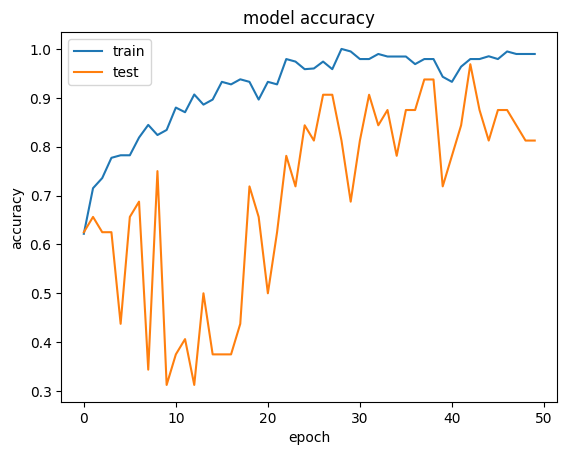

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()